# Práctica #6 Redes nueronales (SCKIT) estandarizados

### En esta práctica implementamos un modelo de clasificación utilizando una red neuronal con la técnica de propagación hacia atrás (NNBP). La red se implement+o utilizando la librería de código abierto SCIKIT*LEARN, y la clase MLP Classifier(). Se van a estandarizar los datos para mejorar el procesamiento del clasificador

## Librerías

In [28]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Cargar el dataset

In [29]:
datos = pd.read_csv(filepath_or_buffer="iris.csv", delimiter=";")
print(datos.shape)
print(datos.head())

(150, 5)
   s.largo  s.ancho  p.largo  p.ancho    tipo
0      5.1      3.5      1.4      0.2  setosa
1      4.9      3.0      1.4      0.2  setosa
2      4.7      3.2      1.3      0.2  setosa
3      4.6      3.1      1.5      0.2  setosa
4      5.0      3.6      1.4      0.2  setosa


#### Eliminar variable predictora de X

In [30]:
X = datos.iloc[:, :4]
X.head()

,s.largo,s.ancho,p.largo,p.ancho
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Normalizar datos

### Utilizamos la clase StandardScaler para normalizar los datos

In [31]:
datos.iloc[:, 0:4] = StandardScaler().fit_transform(datos.iloc[:, 0:4])
datos.head()

,s.largo,s.ancho,p.largo,p.ancho,tipo
0,-0.900681,1.032057,-1.341272,-1.312977,setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,setosa
2,-1.385353,0.337848,-1.398138,-1.312977,setosa
3,-1.506521,0.106445,-1.284407,-1.312977,setosa
4,-1.021849,1.263460,-1.341272,-1.312977,setosa


#### Extraer variable a predecir en y

In [32]:
y = datos.iloc[: , 4:]
y.head()

,tipo
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


#### Funcion para calcular que tan bueno es el modelo

In [33]:
def indices_general(MC, nombres=None):
    precision_global = np.sum(MC.diagonal()) / np.sum(MC)
    error_global = 1 - precision_global
    precision_categorica = pd.DataFrame(MC.diagonal()/np.sum(MC,axis=1)).T
    if nombres != None:
        precision_categorica.columns = nombres
    return {
        "Matriz de confusion": MC,
        "Precision global": precision_global,
        "Error global": error_global,
        "Precision por categoria": precision_categorica
    }

In [34]:
errores = list()
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)
    instancia_red = MLPClassifier(solver="lbfgs")
    instancia_red.fit(X_train, y_train.iloc[:,0].values)
    prediccion = instancia_red.predict(X_test)
    MC = confusion_matrix(y_test, prediccion)
    indices = indices_general(MC,list(np.unique(y)))
    errores.append(indices['Error global'])
    # for k in indices:
    #     print("\n%s:\n%s"%(k,str(indices[k])))

d:\Python\Python 3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
d:\Python\Python 3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
d:\Python\Python 3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

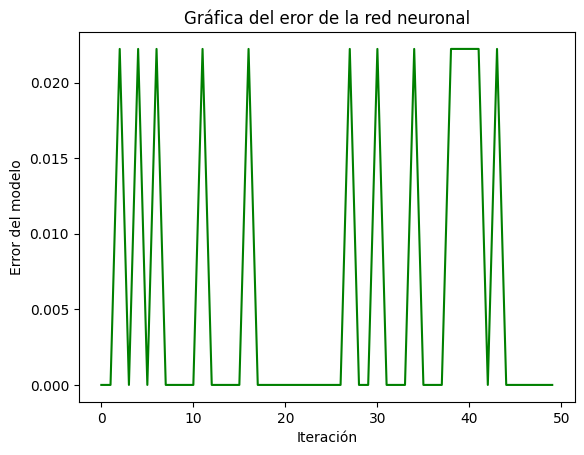

In [35]:
plt.plot([i for i in range(50)],errores, linestyle="-", color="g")
plt.xlabel("Iteración")
plt.ylabel("Error del modelo")
plt.title("Gráfica del eror de la red neuronal")
plt.show()

### Conclusión

En esta práctica utilizamos un algoritmo de aprendizaje automático para clasificar clases de las flores de iris. Utlizando las Redes neuronales de propagación hacia atrás, utilizamos las características de longitud y ancho del pétalo, y longitud y ancho del séfalo.

<p>URL: SCKIT-LEARN (Machine learning python 2024): <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html">https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html</a></p>